In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [14]:
df = pd.read_csv('olist_complete.csv')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  payment_sequential            

In [16]:
df.drop(columns="review_comment_title", inplace=True)

In [17]:
df.drop(columns="review_comment_message", inplace=True)

In [18]:
df.isnull().sum()   

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_creation_date              997
review_answer_timestamp           997
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_cate

In [19]:
#df= df[df['order_approved_at'].notna()]
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'],errors='coerce' )
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'],errors='coerce' )
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce' )
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],errors='coerce' )
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],errors='coerce' )
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'],errors='coerce' )
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'],errors='coerce' )
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce' )
df["review_answer_timestamp"] = pd.to_datetime(df["review_answer_timestamp"], errors='coerce') 
df["review_creation_date"] = pd.to_datetime(df["review_creation_date"], errors='coerce')
#df["shipping_limit_date"] = pd.to_datetime(df["shipping_limit_date"], errors='coerce')









In [20]:
df['payment_value'] = df['payment_value'].astype(float, errors='ignore')
df['freight_value'] = df['freight_value'].astype(float, errors='ignore')
df['price'] = df['price'].astype(float, errors='ignore')
df["product_weight_g"] = df["product_weight_g"].astype('Int64', errors='ignore')
df["product_length_cm"] = df["product_length_cm"].astype('Int64', errors='ignore')
df["product_height_cm"] = df["product_height_cm"].astype('Int64', errors='ignore')
df["product_width_cm"] = df["product_width_cm"].astype('Int64', errors='ignore')
df["payment_installments"] = df["payment_installments"].astype('Int64', errors='ignore')   
df["payment_sequential"] = df["payment_sequential"].astype('Int64', errors='ignore')
df["product_photos_qty"] = df["product_photos_qty"].astype('Int64', errors='ignore')
df["geolocation_zip_code_prefix"] = df["geolocation_zip_code_prefix"].astype('Int64', errors='ignore')
df["geolocation_lat"] = df["geolocation_lat"].astype("int64", errors='ignore')
df["geolocation_lng"] = df["geolocation_lng"].astype("int64", errors='ignore')





In [21]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype("int64", errors='ignore')


In [22]:
df.dropna(subset=["product_id"], inplace=True)


In [23]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         978
review_score                      978
review_creation_date              978
review_answer_timestamp           978
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

In [24]:
df[["payment_sequential", "payment_value","payment_installments","payment_type"]].isnull().sum()


payment_sequential      3
payment_value           3
payment_installments    3
payment_type            3
dtype: int64

In [25]:
missing_orders = df[df['payment_installments'].isna()]['order_status'].value_counts()
df[df["payment_value"].isin(missing_orders)]
   


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
76573,c98632bdc4c3bd2066cdea237cf8f468,024676cef113f6c81db6c5b8d29e5ee9,8290,sao paulo,SP,1d9a9731b9c10fc9cba74e6f74782e8b,delivered,2018-05-01 14:30:35,2018-05-01 14:55:16,2018-05-02 15:05:00,...,36,36,20,3187.0,sao paulo,SP,home_construction,8290,-23.553642,-46.452661


In [26]:
df.dropna(subset="payment_value", inplace=True)


In [27]:
df['review_id'] = df['review_id'].fillna('No_Review_Submited')
df['review_score'] = df['review_score'].fillna(0)  # Or "Not Rated"
df['review_creation_date'] = df['review_creation_date'].fillna('No_Date')
df['review_answer_timestamp'] = df['review_answer_timestamp'].fillna('No_Timestamp_Record')


In [28]:
missing_order_items = df[df['order_item_id'].isna()]['order_id'].unique()
print(len(missing_order_items), "orders with no items")


0 orders with no items


In [29]:
df = df.dropna(subset=['order_item_id'])


In [30]:
missing_products = df[df['product_category_name'].isna()]['product_id'].unique()
print(len(missing_products, ), "products with no category")


610 products with no category


In [31]:
df['product_category_name'].fillna('unknown')


0              moveis_escritorio
1          utilidades_domesticas
2              moveis_escritorio
3              moveis_escritorio
4                  casa_conforto
                   ...          
119138    livros_interesse_geral
119139             esporte_lazer
119140              beleza_saude
119141        relogios_presentes
119142                perfumaria
Name: product_category_name, Length: 118307, dtype: object

In [32]:

english_map = {
    "beleza_saude": "health_beauty",
    "informatica_acessorios": "computers_accessories",
    "automotivo": "auto",
    "cama_mesa_banho": "bed_bath_table",
    "moveis_decoracao": "furniture_decor",
    "esporte_lazer": "sports_leisure",
    "perfumaria": "perfumery",
    "utilidades_domesticas": "housewares",
    "telefonia": "telephony",
    "relogios_presentes": "watches_gifts",
    "alimentos_bebidas": "food_drink",
    "bebes": "baby",
    "papelaria": "stationery",
    "tablets_impressao_imagem": "tablets_printing_image",
    "brinquedos": "toys",
    "telefonia_fixa": "fixed_telephony",
    "ferramentas_jardim": "garden_tools",
    "fashion_bolsas_e_acessorios": "fashion_bags_accessories",
    "eletroportateis": "small_appliances",
    "consoles_games": "consoles_games",
    "audio": "audio",
    "fashion_calcados": "fashion_shoes",
    "cool_stuff": "cool_stuff",
    "malas_acessorios": "luggage_accessories",
    "climatizacao": "air_conditioning",
    "construcao_ferramentas_construcao": "construction_tools_construction",
    "moveis_cozinha_area_de_servico_jantar_e_jardim": "kitchen_dining_laundry_garden_furniture",
    "construcao_ferramentas_jardim": "costruction_tools_garden",
    "fashion_roupa_masculina": "fashion_male_clothing",
    "pet_shop": "pet_shop",
    "moveis_escritorio": "office_furniture",
    "market_place": "market_place",
    "eletronicos": "electronics",
    "eletrodomesticos": "home_appliances",
    "artigos_de_festas": "party_supplies",
    "casa_conforto": "home_confort",
    "construcao_ferramentas_ferramentas": "costruction_tools_tools",
    "agro_industria_e_comercio": "agro_industry_and_commerce",
    "moveis_colchao_e_estofado": "furniture_mattress_and_upholstery",
    "livros_tecnicos": "books_technical",
    "casa_construcao": "home_construction",
    "instrumentos_musicais": "musical_instruments",
    "moveis_sala": "furniture_living_room",
    "construcao_ferramentas_iluminacao": "construction_tools_lights",
    "industria_comercio_e_negocios": "industry_commerce_and_business",
    "alimentos": "food",
    "artes": "art",
    "moveis_quarto": "furniture_bedroom",
    "livros_interesse_geral": "books_general_interest",
    "construcao_ferramentas_seguranca": "construction_tools_safety",
    "fashion_underwear_e_moda_praia": "fashion_underwear_beach",
    "fashion_esporte": "fashion_sport",
    "sinalizacao_e_seguranca": "signaling_and_security",
    "pcs": "computers",
    "artigos_de_natal": "christmas_supplies",
    "fashion_roupa_feminina": "fashio_female_clothing",
    "eletrodomesticos_2": "home_appliances_2",
    "livros_importados": "books_imported",
    "bebidas": "drinks",
    "cine_foto": "cine_photo",
    "la_cuisine": "la_cuisine",
    "musica": "music",
    "casa_conforto_2": "home_comfort_2",
    "portateis_casa_forno_e_cafe": "small_appliances_home_oven_and_coffee",
    "cds_dvds_musicais": "cds_dvds_musicals",
    "dvds_blu_ray": "dvds_blu_ray",
    "flores": "flowers",
    "artes_e_artesanato": "arts_and_craftmanship",
    "fraldas_higiene": "diapers_and_hygiene",
    "fashion_roupa_infanto_juvenil": "fashion_childrens_clothes",
    "seguros_e_servicos": "security_and_services"
}

df['product_category_name_english'] = df.apply(
    lambda row: english_map.get(row['product_category_name_english'], 'unknown') if pd.isna(row['product_category_name_english']) else row['product_category_name_english'],
    axis=1
)


In [33]:
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].fillna(df['geolocation_zip_code_prefix'].mode()[0])
df['geolocation_lat'] = df['geolocation_lat'].fillna(df['geolocation_lat'].median())
df['geolocation_lng'] = df['geolocation_lng'].fillna(df['geolocation_lng'].median())


In [34]:
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].abs()
df['geolocation_lat'] = df['geolocation_lat'].abs()
df['geolocation_lng'] = df['geolocation_lng'].abs()


In [35]:
df["product_name_lenght"] = df["product_name_lenght"].fillna(df["product_name_lenght"].median())
df["product_description_lenght"] = df["product_description_lenght"].fillna(df["product_description_lenght"].median())
df["product_photos_qty"] = df["product_photos_qty"].fillna(df["product_photos_qty"].mode()[0])
df["product_weight_g"] = df["product_weight_g"].fillna(df["product_weight_g"].median())
df["product_length_cm"] = df["product_length_cm"].fillna(df["product_length_cm"].median())
df["product_height_cm"] = df["product_height_cm"].fillna(df["product_height_cm"].median())
df["product_width_cm"] = df["product_width_cm"].fillna(df["product_width_cm"].median())

In [55]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

Detecting outliers 

In [37]:
def remove_outliers_iqr(df, cols,multiplier=1.5, max_outliers_col=2):
    outliers_flags = pd.DataFrame(index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers_flags[col] = ~df[col].between(lower_bound, upper_bound)
    outliers_count = outliers_flags.sum(axis = 1)
    df = df[outliers_count <= max_outliers_col]
    return df, outliers_count
    

In [38]:
numeric_cols = [
    'product_weight_g', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'price', 'freight_value', 'payment_value'
]

df_cleaned, outliers_count = remove_outliers_iqr(
    df, numeric_cols, multiplier=1.5, max_outliers_col=2
)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
print("Rows removed:", df.shape[0] - df_cleaned.shape[0])


Original shape: (118307, 41)
Cleaned shape: (110845, 41)
Rows removed: 7462


Exploratory Data Analysis (EDA) and Visualization

1.Which customers made the most purchases (top 5)

In [39]:
df_cleaned.shape

(110845, 41)

In [40]:
customer_purchased_total= df_cleaned.groupby('customer_unique_id')['payment_value'].sum()
top_customers= customer_purchased_total.sort_values(ascending=False).head(5)
top_customers 

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    109312.64
698e1cf81d01a3d389d96145f7fa6df8     45256.00
c402f431464c72e27330a67f7b94d4fb     44048.00
4007669dec559734d6f53e029e360987     36489.24
ef8d54b3797ea4db1d63f0ced6a906e9     30186.00
Name: payment_value, dtype: float64

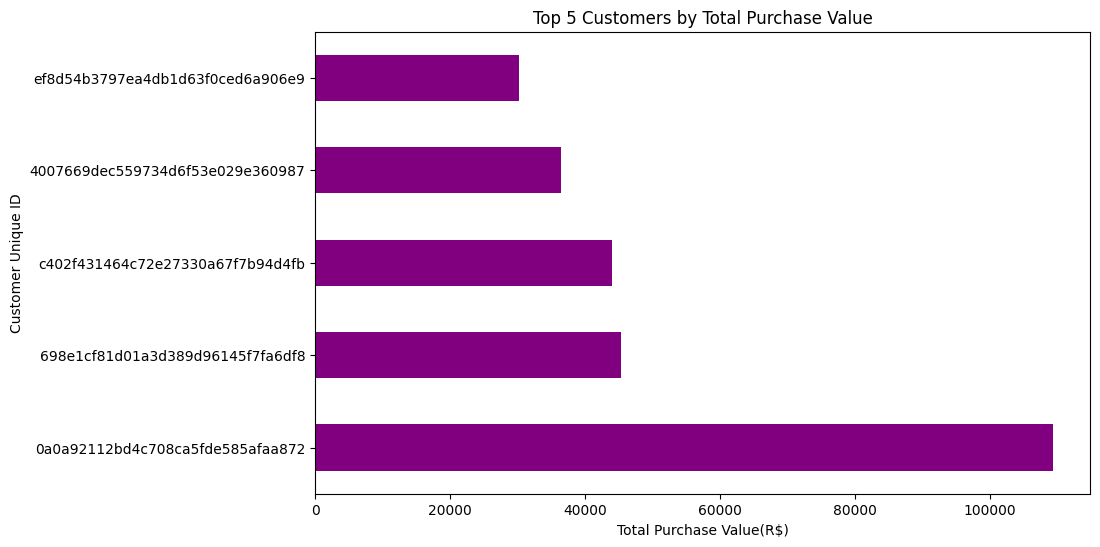

In [41]:
top_customers.head().plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Top 5 Customers by Total Purchase Value')
plt.ylabel('Customer Unique ID')
plt.xlabel('Total Purchase Value(R$)')
plt.show()

2. Which sellers have the most sales

In [42]:
df_cleaned = df_cleaned.copy()
df_cleaned["complete_orders"]= df_cleaned.loc[df_cleaned["order_status"].isin(["delivered","shipped"]),"order_id"]
df_cleaned["complete_orders"]

0         00e7ee1b050b8499577073aeb2a297a1
2         b2059ed67ce144a36e2aa97d2c9e9ad2
3         951670f92359f4fe4a63112aa7306eba
4         6b7d50bd145f6fc7f33cebabd7e49d0f
5         5741ea1f91b5fbab2bd2dc653a5b5099
                        ...               
119138    6760e20addcf0121e9d58f2f1ff14298
119139    9ec0c8947d973db4f4e8dcf1fbfa8f1b
119140    fed4434add09a6f332ea398efd656a5c
119141    e31ec91cea1ecf97797787471f98a8c2
119142    28db69209a75e59f20ccbb5c36a20b90
Name: complete_orders, Length: 110845, dtype: object

In [43]:
high_sellers = df_cleaned.groupby("seller_id")["complete_orders"].count().sort_values(ascending=False).head(5)
high_sellers

seller_id
6560211a19b47992c3666cc44a7e94c0    2119
4a3ca9315b744ce9f8e9374361493884    2117
1f50f920176fa81dab994f9023523100    2003
cc419e0650a3c5ba77189a1882b7556a    1873
da8622b14eb17ae2831f4ac5b9dab84a    1654
Name: complete_orders, dtype: int64

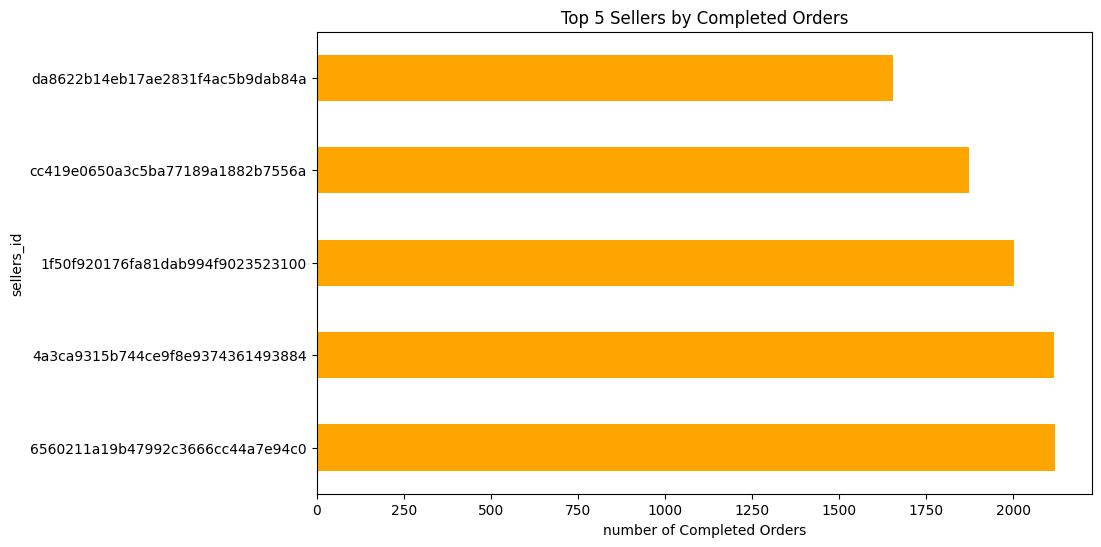

In [44]:
high_sellers.head().plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Top 5 Sellers by Completed Orders') 
plt.xlabel('number of Completed Orders')
plt.ylabel('sellers_id') 
plt.show()

3.How many orders are made per month

In [45]:

df_cleaned["order_month"] = df_cleaned["order_purchase_timestamp"].dt.to_period("M")

orders_per_month = (
    df_cleaned.groupby("order_month")["order_id"]
    .count().reset_index(name="order_count"))

orders_per_month


,order_month,order_count
0,2016-09,3
1,2016-10,363
2,2016-12,1
3,2017-01,958
4,2017-02,1905
5,2017-03,3007
6,2017-04,2659
7,2017-05,4189
8,2017-06,3603
9,2017-07,4566


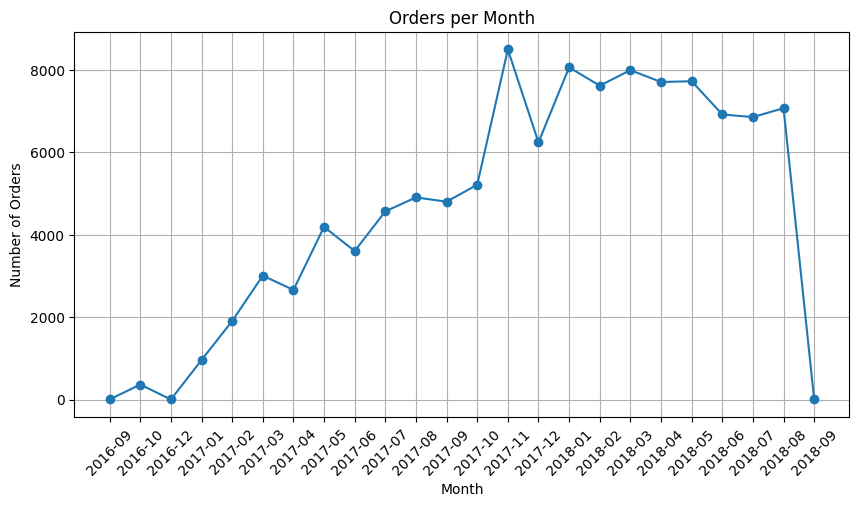

In [46]:
plt.figure(figsize=(10,5))
plt.plot(orders_per_month["order_month"].astype(str), orders_per_month["order_count"], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders per Month")
plt.grid(True)
plt.show()


4. Is there any seasonality in order volume

In [47]:
Brazil = pd.read_csv('brazil_holidays.csv', parse_dates=['Date'])
Brazil["Date"] = Brazil["Date"].dt.strftime("%m-%d")
Brazil["Holidays"] = True
Brazil.head(10)


,Date,Holiday Name,Type,Holidays
0,01-01,New Year's Day,National Holiday,True
1,01-25,São Paulo Anniversary,Not A Public Holiday,True
2,02-28,Carnival,National Holiday,True
3,03-01,Carnival,National Holiday,True
4,04-15,Good Friday,National Holiday,True
5,04-21,Tiradentes Day,National Holiday,True
6,05-01,Labour Day,National Holiday,True
7,05-08,Mother's Day,Not A Public Holiday,True
8,06-16,Corpus Christi,National Holiday,True
9,07-09,State Rebellion Day,Regional Holiday,True


In [48]:
df_cleaned = df_cleaned.copy()
df_cleaned["purchase_day_month"] = df_cleaned["order_purchase_timestamp"].dt.strftime("%m-%d")
df_cleaned = df_cleaned.merge(Brazil, left_on="purchase_day_month", right_on="Date", how="left")
df_cleaned["Holidays"] = df_cleaned["Holidays"].fillna(False).astype(bool)

C:\Users\EMMYFLASH\AppData\Local\Temp\ipykernel_1704\3907260913.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned["Holidays"] = df_cleaned["Holidays"].fillna(False).astype(bool)


In [49]:
df_cleaned["Holidays"].value_counts()

Holidays
False    106087
True       4758
Name: count, dtype: int64

In [50]:
df_cleaned.drop(columns=['Holiday Name', 'Date', "Type" ], inplace=True)

In [51]:
daily_orders = df_cleaned.groupby(["purchase_day_month","Holidays"]).size().reset_index(name='order_count')
daily_mean = daily_orders.groupby("Holidays")["order_count"].mean()
daily_mean

Holidays
False    305.726225
True     264.333333
Name: order_count, dtype: float64

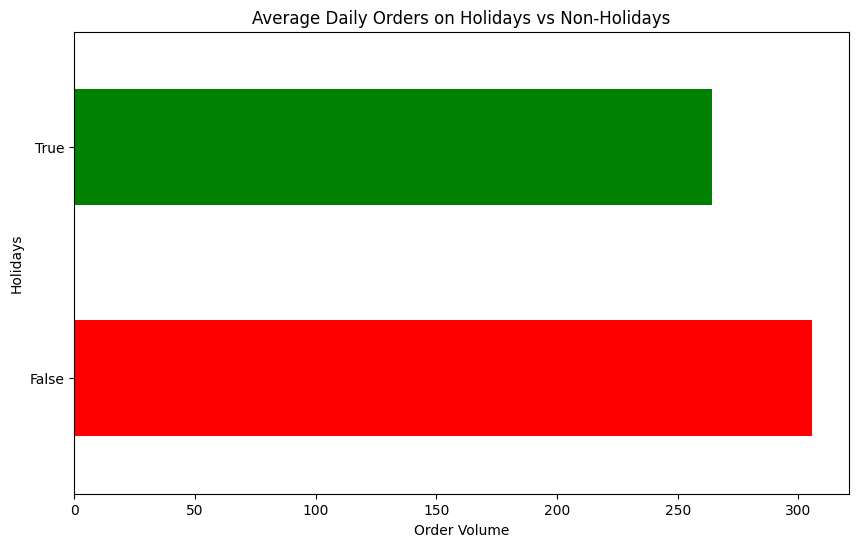

In [52]:
daily_orders.groupby("Holidays")["order_count"].mean().plot(kind='barh', figsize=(10, 6), color=['red', 'green'])
plt.title('Average Daily Orders on Holidays vs Non-Holidays')
plt.ylabel('Holidays')
plt.xlabel('Order Volume')
plt.show()

In [53]:
order_index = df_cleaned.set_index("order_purchase_timestamp")
orders_daily = order_index["order_id"].resample('W').nunique().count()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(orders_daily, model='additive', period=52)
plt.plot(decomp.seasonal , color = "maroon")
plt.title('Seasonal Component of Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.show()

5. Analyze One Time and Returning Customers

In [56]:
customer_order_count = df_cleaned.groupby('customer_unique_id')['order_id'].nunique()
one_time_customers = (customer_order_count == 1).sum()
returning_customers = (customer_order_count > 1).sum()
one_time_customers

np.int64(86987)

In [57]:
returning_customers

np.int64(2676)

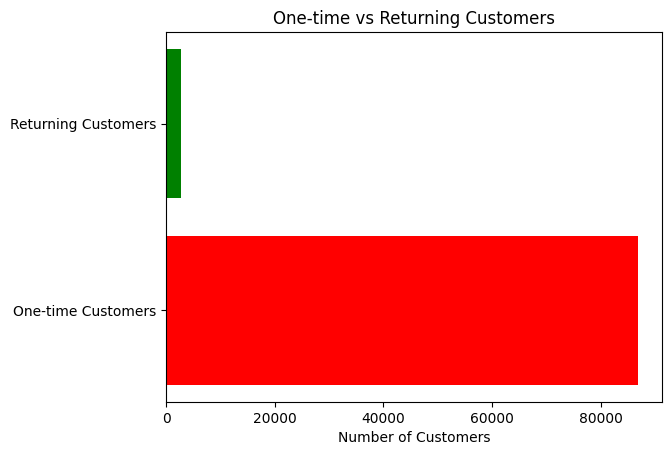

In [ ]:

plt.barh(['One-time Customers', 'Returning Customers'], [one_time_customers, returning_customers], color=['red', 'green'])
plt.title('One-time vs Returning Customers')
plt.xlabel('Number of Customers')
plt.show()

6. Average product rating by customers

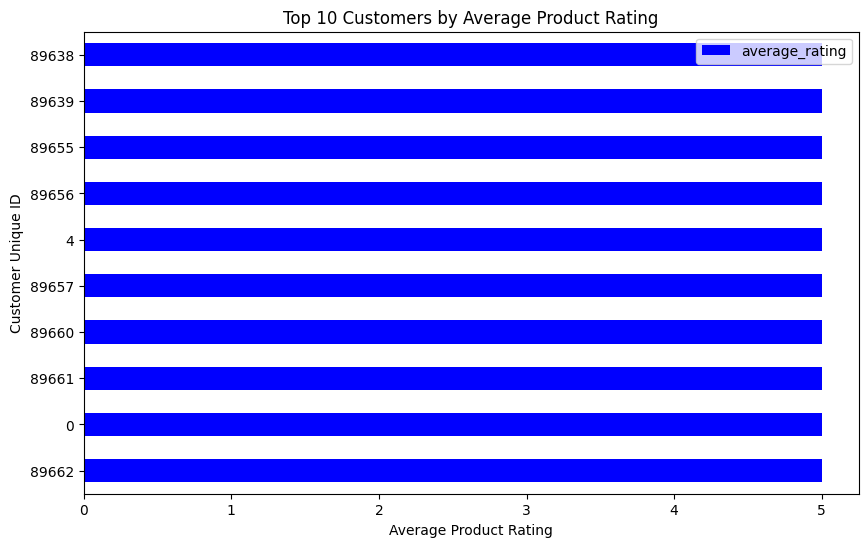

In [ ]:
average_rating = df_cleaned.groupby('customer_unique_id')['review_score'].mean().reset_index()
average_rating.rename(columns={'review_score': 'average_rating'}, inplace=True)
average_rating.sort_values("average_rating",ascending=False, inplace=True)
average_rating.head(10).plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Customers by Average Product Rating')
plt.xlabel('Average Product Rating')
plt.ylabel('Customer Unique ID')
plt.xticks(rotation=360)
plt.show()

In [ ]:
overall_rating = df_cleaned.groupby('customer_unique_id')['review_score'].mean()
print(f"Overall average rating per customer: {overall_rating.mean():.2f}")

Overall average rating per customer: 4.08


7. Most Popular products 

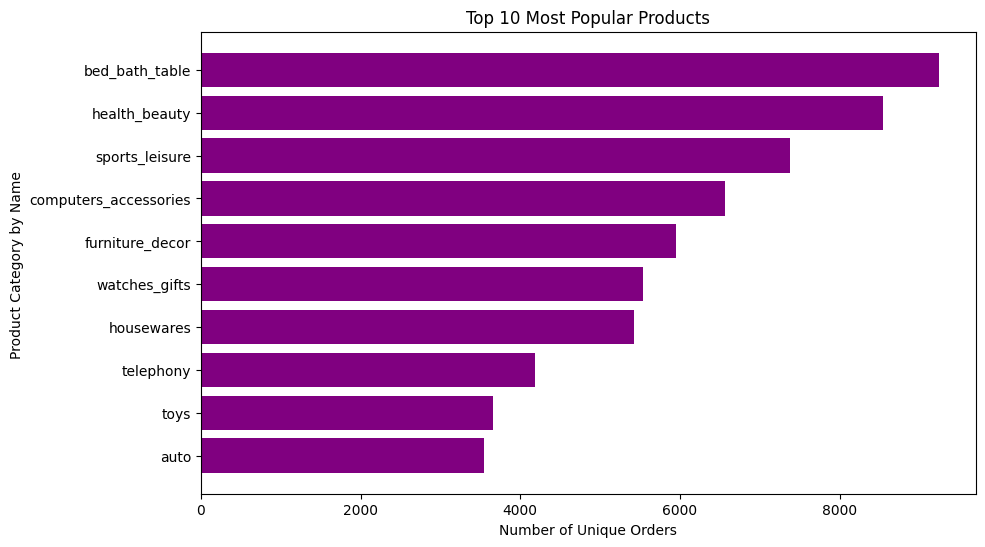

In [ ]:
popular_product = (df_cleaned.groupby("product_category_name_english")["order_id"].nunique().reset_index(name="order_count").sort_values("order_count",ascending=False))
plt.figure(figsize=(10, 6))
plt.barh(
    popular_product["product_category_name_english"].head(10),
    popular_product["order_count"].head(10),
    color='purple'
)
plt.title('Top 10 Most Popular Products')  
plt.xlabel('Number of Unique Orders')
plt.ylabel('Product Category by Name ')
plt.gca().invert_yaxis()
plt.show()

8. what is the distribution of payment type

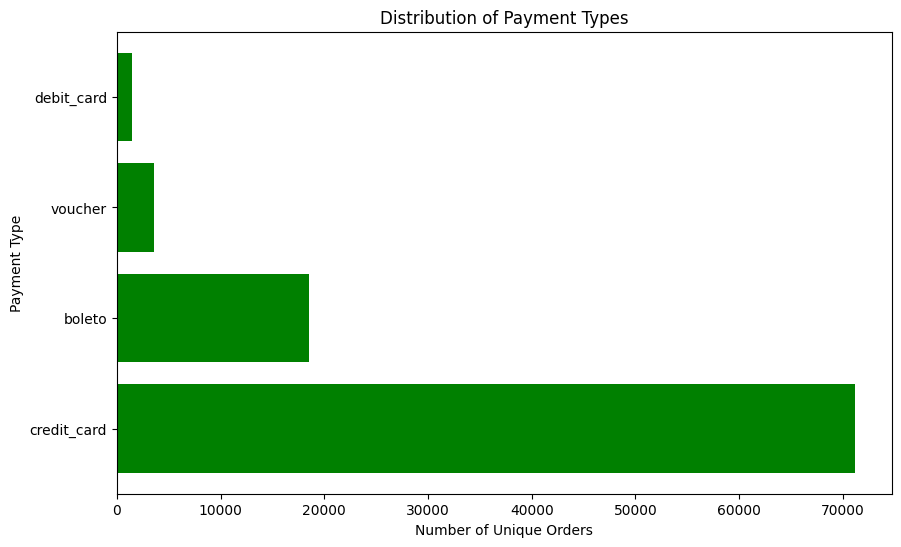

In [ ]:
payment_distribution = df_cleaned.groupby('payment_type')['order_id'].nunique().reset_index(name='payment_count').sort_values('payment_count', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(
    payment_distribution['payment_type'],
    payment_distribution['payment_count'],
    color='green'
)
plt.title('Distribution of Payment Types')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Payment Type')
plt.show()

9. payment type with the highest average payment value 

In [62]:
df_cleaned["order_status"]

0         delivered
1         delivered
2         delivered
3         delivered
4         delivered
            ...    
110840    delivered
110841    delivered
110842    delivered
110843    delivered
110844    delivered
Name: order_status, Length: 110845, dtype: object

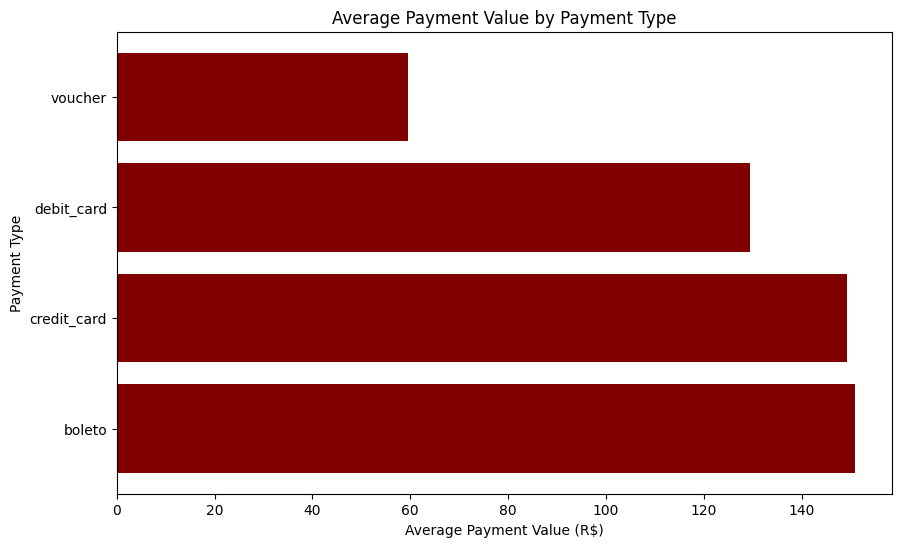

In [63]:

valid_orders = df_cleaned[df_cleaned["order_status"].isin(["delivered", "shipped","processing","invoiced"])]
average_payment_value = valid_orders.groupby('payment_type')['payment_value'].mean().reset_index(name="payment_value_count").sort_values('payment_value_count', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(
    average_payment_value['payment_type'],
    average_payment_value['payment_value_count'],
    color='maroon'
)
plt.title('Average Payment Value by Payment Type')
plt.xlabel('Average Payment Value (R$)')
plt.ylabel('Payment Type')
plt.show()

10. How Many customers pay in a single installment vs multiple 

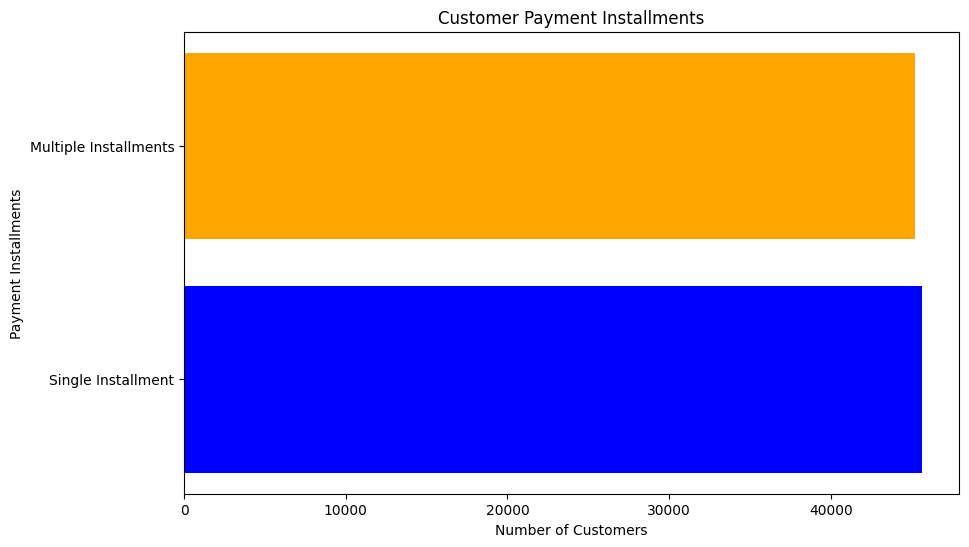

In [68]:
single_pay = df_cleaned[df_cleaned["payment_installments"]==1].groupby("customer_unique_id")["payment_installments"].nunique().reset_index(name="single_payment_count").count()
multi_pay = df_cleaned[df_cleaned["payment_installments"]>1].groupby("customer_unique_id")["payment_installments"].nunique().reset_index(name="multi_payment_count").count()
Customer_pays = pd.DataFrame({
    'Payment Installments': ['Single Installment', 'Multiple Installments'],
    'Number of Customers': [single_pay, multi_pay]
})

x = ['Single Installment', 'Multiple Installments']
y = [single_pay['single_payment_count'], multi_pay['multi_payment_count']]

plt.figure(figsize=(10, 6))
plt.barh(['Single Installment', 'Multiple Installments'], [single_pay['customer_unique_id'], multi_pay['customer_unique_id']], color=['blue', 'orange'])
plt.title('Customer Payment Installments')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Installments')
plt.show()

In [66]:
# Step 1: For each customer, find their max installment count
customer_installments = df_cleaned.groupby("customer_unique_id")["payment_installments"].max()

# Step 2: Classify customers
customer_payment_type = customer_installments.apply(lambda x: "Single" if x == 1 else "Multiple")

# Step 3: Count customers
customer_counts = customer_payment_type.value_counts()

print(customer_counts)


payment_installments
Multiple    45212
Single      44451
Name: count, dtype: int64


What product categories have the highest review scores

In [123]:
cat_review_rating = (df_cleaned.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False).head(5))
cat_review_rating


product_category_name_english
cds_dvds_musicals            4.642857
fashion_childrens_clothes    4.500000
books_general_interest       4.414591
books_imported               4.409836
fashion_sport                4.344828
Name: review_score, dtype: float64

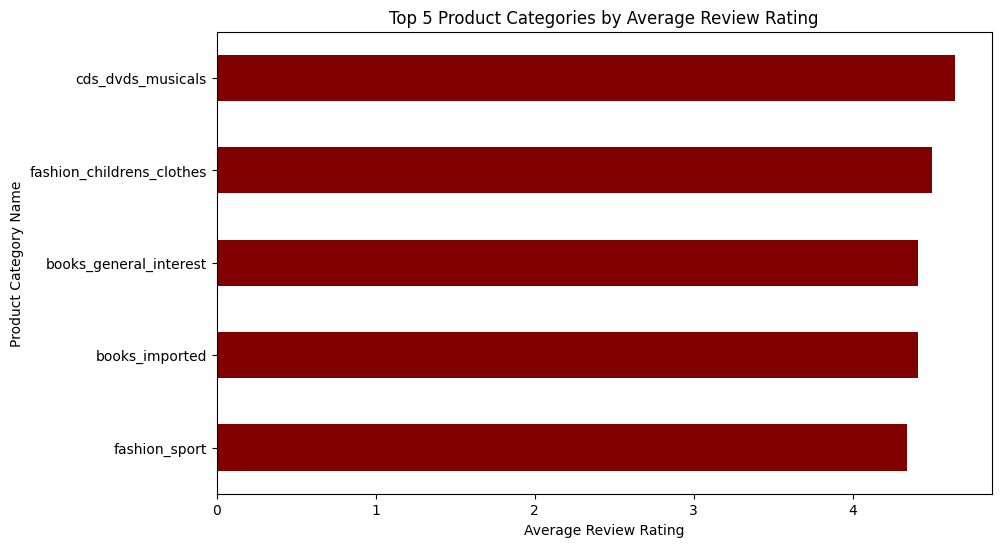

In [124]:
plt.figure(figsize=(10, 6))
cat_review_rating.plot(kind='barh', color='maroon')
plt.title('Top 5 Product Categories by Average Review Rating')
plt.xlabel('Average Review Rating')
plt.ylabel('Product Category Name')
plt.gca().invert_yaxis()
plt.show()

11. Which products have the longest delivery times

In [82]:
df_cleaned["delivery_day"] = df_cleaned["order_delivered_customer_date"] - df_cleaned["order_purchase_timestamp"]
df_cleaned["delivery_day"] = df_cleaned["delivery_day"].dt.days
category_delivery = df_cleaned.groupby("product_category_name_english")["delivery_day"].mean().sort_values(ascending=False).head(10)
category_delivery

product_category_name_english
office_furniture                     19.198034
christmas_supplies                   15.380000
security_and_services                15.000000
furniture_mattress_and_upholstery    15.000000
fashion_shoes                        14.809524
home_comfort_2                       13.806452
garden_tools                         13.254975
home_confort                         13.090090
fashion_underwear_beach              13.078571
consoles_games                       12.914260
Name: delivery_day, dtype: float64

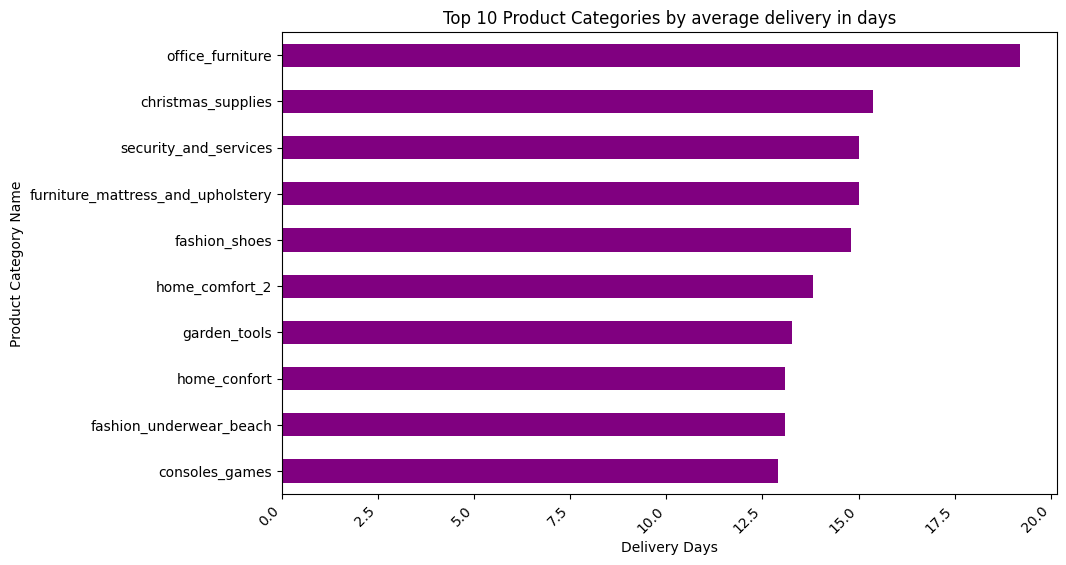

In [122]:
plt.figure(figsize=(10, 6))
category_delivery.plot(kind='barh', color='purple')
plt.title('Top 10 Product Categories by average delivery in days')
plt.xlabel('Delivery Days')
plt.ylabel('Product Category Name')
plt.xticks(rotation=45, ha="right")
plt.gca().invert_yaxis()
plt.show()

12. What is the average product price and freight cost per category

In [130]:
avg_freight_price = df_cleaned.groupby("product_category_name_english")[["price", "freight_value"]].mean()
avg_freight_price.rename(columns={"price": "average_price", "freight_value": "average_freight_cost"}, inplace=True)
# avg_freight_price = avg_freight_price.sort_values(ascending=False)
avg_freight_price.head(30)

,average_price,average_freight_cost
product_category_name_english,,
agro_industry_and_commerce,257.794505,20.880385
air_conditioning,121.691471,18.877143
art,82.332963,18.138843
arts_and_craftmanship,68.522174,13.104783
audio,134.479603,15.542434
auto,103.129735,18.402833
baby,87.365488,17.921855
bed_bath_table,86.558048,17.673771
books_general_interest,82.291370,16.404253


<Figure size 1200x600 with 0 Axes>

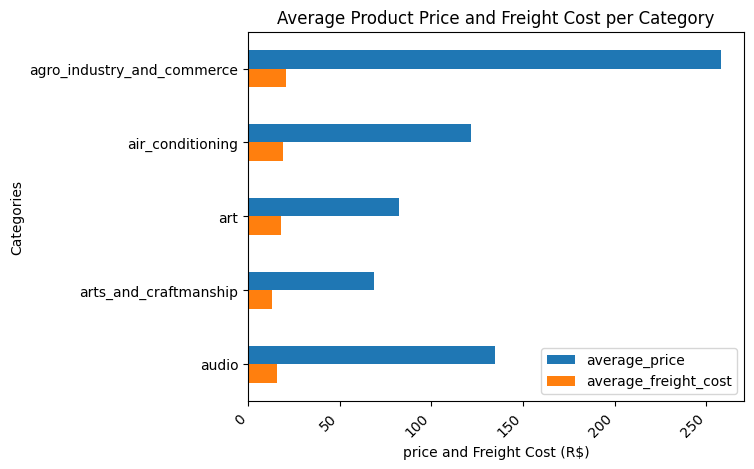

In [132]:
plt.figure(figsize=(12, 6))
avg_freight_price.head(5).plot(kind= "barh")
plt.title('Average Product Price and Freight Cost per Category')
plt.xlabel('price and Freight Cost (R$)')
plt.ylabel("Categories")
plt.xticks(rotation=45, ha="right")
plt.gca().invert_yaxis()
plt.show()

13. Which product categories have the highest return or low ratings

In [136]:
category_reviews = df_cleaned.groupby('product_category_name_english')['review_score'].mean().sort_values()

print(category_reviews.head(5)) 


product_category_name_english
security_and_services                2.500000
diapers_and_hygiene                  3.256410
furniture_mattress_and_upholstery    3.272727
home_comfort_2                       3.290323
furniture_bedroom                    3.450000
Name: review_score, dtype: float64


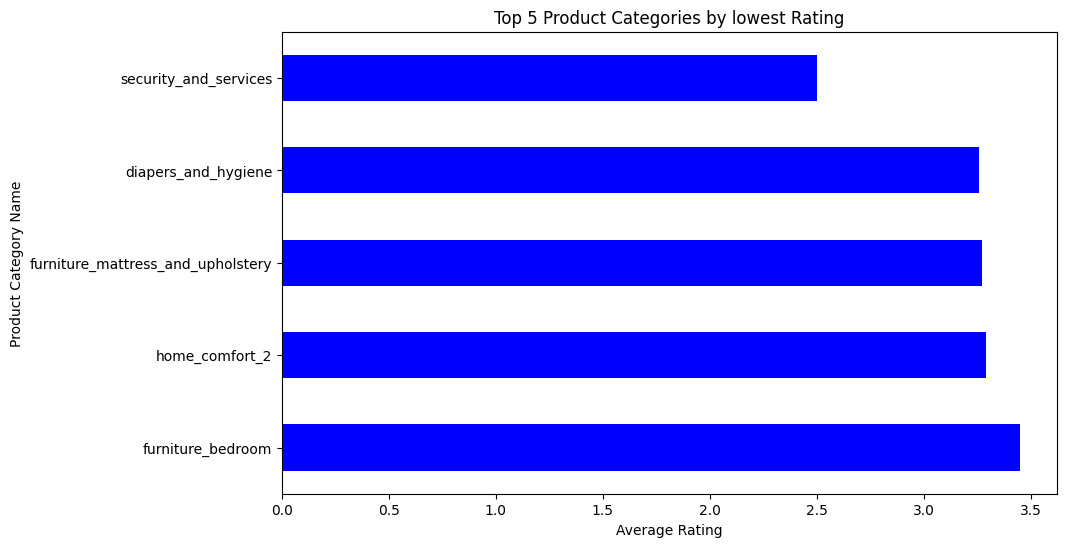

In [137]:
plt.figure(figsize=(10, 6))
category_reviews.head(5).plot(kind='barh', color='blue')
plt.title('Top 5 Product Categories by lowest Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category Name')
plt.gca().invert_yaxis()
plt.show()

14. What's the trend of review scores over time

In [140]:
df_cleaned["review_creation_date"] = pd.to_datetime(df_cleaned["review_creation_date"], errors='coerce')
df_cleaned["review_creation_month"] = df_cleaned["review_creation_date"].dt.to_period("M")
trends = df_cleaned.groupby("review_creation_month")["review_score"].mean()
trends.index = trends.index.to_timestamp()
trends

review_creation_month
2016-10-01    4.024631
2016-11-01    3.495575
2016-12-01    2.200000
2017-01-01    4.277580
2017-02-01    4.275235
2017-03-01    4.094394
2017-04-01    4.036290
2017-05-01    4.069281
2017-06-01    4.119376
2017-07-01    4.135619
2017-08-01    4.229967
2017-09-01    4.159887
2017-10-01    4.116368
2017-11-01    4.082579
2017-12-01    3.872348
2018-01-01    3.998380
2018-02-01    3.948166
2018-03-01    3.669302
2018-04-01    3.867892
2018-05-01    4.147190
2018-06-01    4.121052
2018-07-01    4.256001
2018-08-01    4.178351
Freq: MS, Name: review_score, dtype: float64

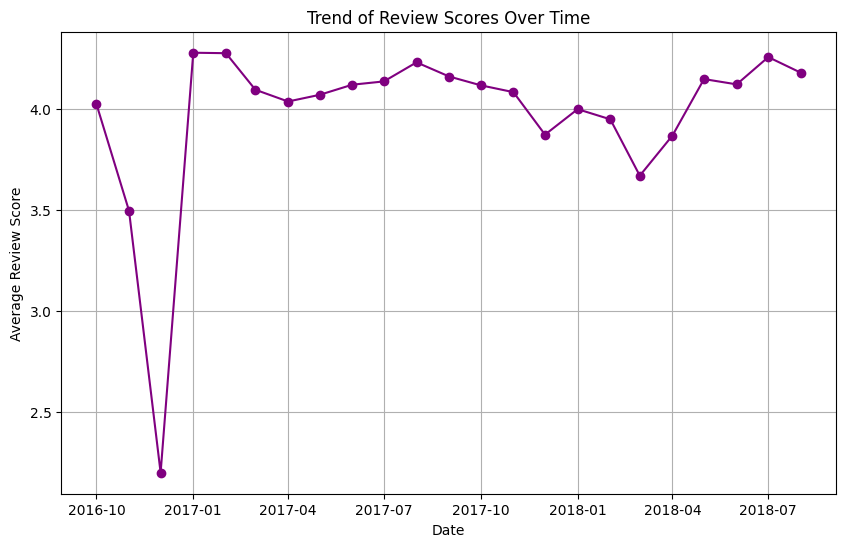

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(trends.index, trends.values, marker='o', color='purple')
plt.title('Trend of Review Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()

In [142]:
target_cities = ["sao paulo", "porto alegre", "curitiba", "fortaleza", "belo horizonte", "salvador"]
target_city = df_cleaned[df_cleaned["customer_city"].str.lower().isin(target_cities)]

average review score per city

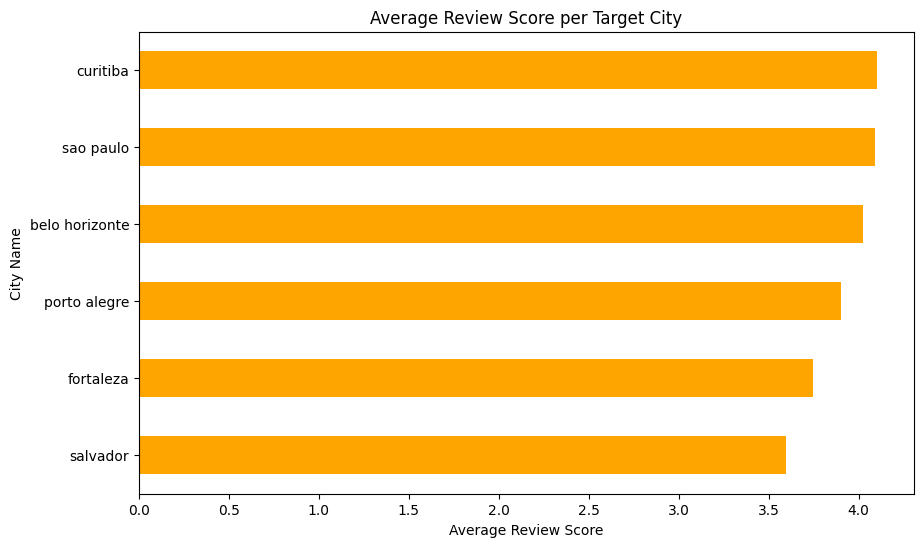

In [145]:
target_city_average_rating = target_city.groupby("customer_city")["review_score"].mean().sort_values(ascending=False)
target_city_average_rating.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Average Review Score per Target City')  
plt.xlabel('Average Review Score')
plt.ylabel('City Name')
plt.gca().invert_yaxis()
plt.show()

Number of Orders per City

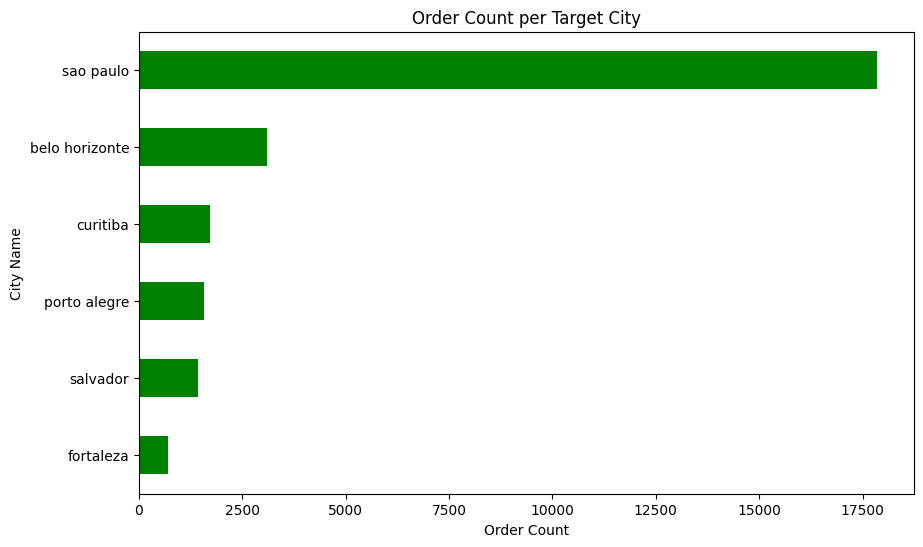

In [147]:
city_orders = target_city["customer_city"].value_counts()
city_orders.columns = ['City', 'Order Count']
city_orders.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Order Count per Target City')
plt.xlabel('Order Count')
plt.ylabel('City Name')
plt.gca().invert_yaxis()
plt.show()

Average delivery time per city

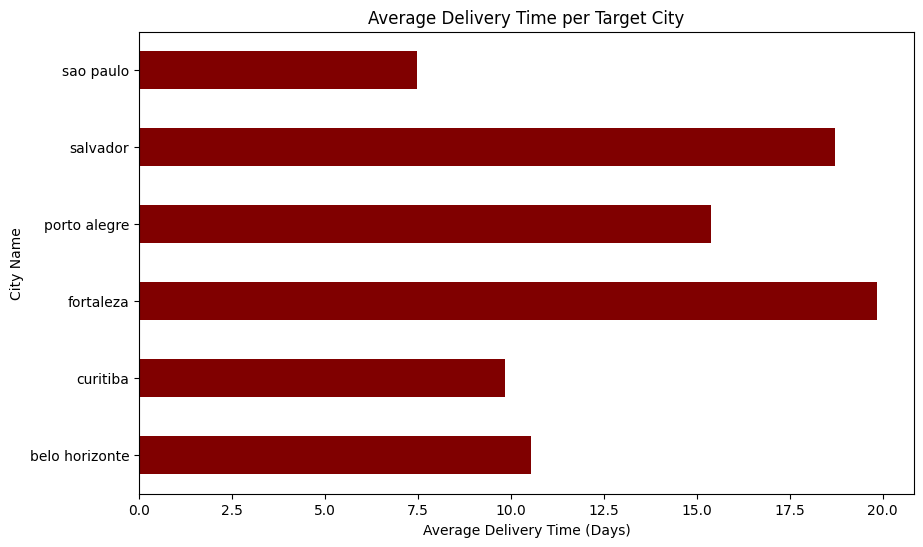

In [153]:
avg_delivery = target_city.groupby("customer_city")["delivery_day"].mean()
avg_delivery.head(10).plot(kind='barh', figsize=(10, 6), color='maroon')
plt.title('Average Delivery Time per Target City')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('City Name')
plt.show()


Average Freight & Price per City

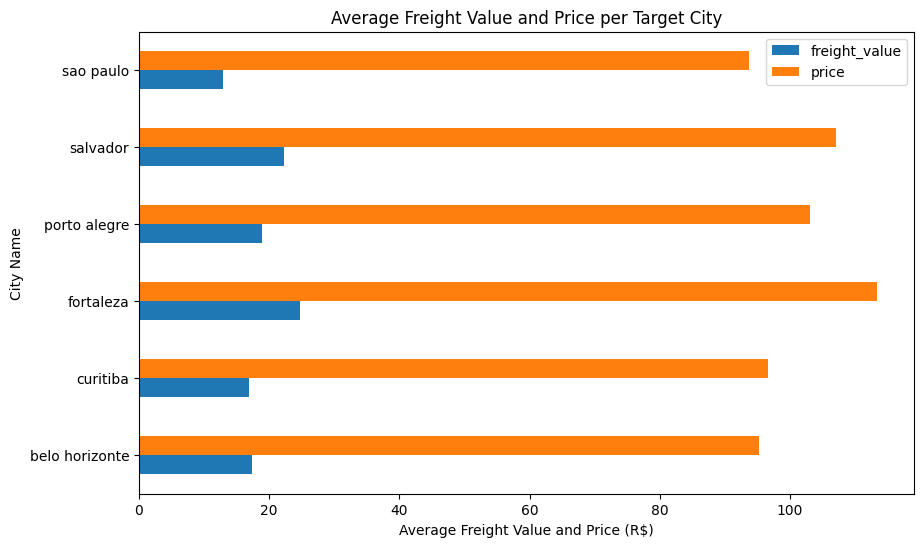

In [157]:
avg_pandf = target_city.groupby("customer_city")[["freight_value", "price"]].mean()
avg_pandf.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Average Freight Value and Price per Target City')
plt.xlabel('Average Freight Value and Price (R$)')
plt.ylabel('City Name')
plt.show()
